# Classifying the MNIST dataset using Keras and CNNs
*Compiled by Benned Hedegaard*

In this notebook, we'll build a convolutional neural network using Keras, train our model to recognize handwritten digits, and then submit the results to a Kaggle competition using the MNIST dataset.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WKCNAtIpJ_0Cmyhn-jAFS9KSCcDUX5H1#scrollTo=kLLfMFZE8aP8&uniqifier=1)

## Import everything we'll need

In [1]:
# Imports everything we'll need. 
# Typically, Colab already has these imported but I've kept these here so that it's clear what we're using.

import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# np.random.seed(7007)  # for reproducibility

Using TensorFlow backend.


In [0]:
# Can create a linear stack of layers.
from keras.models import Sequential
# Basically the core layers of any neural network.
from keras.layers import Dense, Dropout, Activation, Flatten
# Specifically CNN layers.
from keras.layers import Conv2D, MaxPooling2D
# Useful utilities
from keras.utils import np_utils

In [0]:
"""
This example creates a sequential model with a single dense layer with 10 outputs. Note that we need 
to specify the input shape.
"""
m = Sequential([Dense(10, input_shape = (10,)), Activation('linear') ])

In [0]:
"""
We also need to compile a Keras model. This sets up importantparts like its optimizer, loss function, 
and the metrics by which we measure the model's success.
"""
m.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])

A much more elegant way to import the MNIST dataset, but not for Kaggle submissions.
Loads in the MNIST dataset:

from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
!pip install -q xlrd
!git clone https://github.com/Benendead/MNIST_Notebook/

Cloning into 'MNIST_Notebook'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [6]:
!ls MNIST_Notebook/

 30_epochs   dataset.zip  'Keras and CNNs (3).ipynb'   README.md


In [7]:
# Open up the .zip file containing our dataset.
!unzip MNIST_Notebook/dataset.zip

Archive:  MNIST_Notebook/dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
   creating: __MACOSX/
   creating: __MACOSX/dataset/
  inflating: __MACOSX/dataset/._test.csv  
  inflating: dataset/train.csv       
  inflating: __MACOSX/dataset/._train.csv  


In [8]:
# There it is.
!ls dataset/

test.csv  train.csv


In [0]:
# This reads in the .csv files we've imported and uncompressed from Github.
# The test variable here is a pandas DataFrame.
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

## Data Preprocessing

In [10]:
# Previews the imported data. Right now every image is one row. 
# We need to fix that.
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# We now put the datasets into numpy arrays.
np_train = train.values
np_test = test.values

# Prints out the shape and type of the training set dataframe.
print(np_train.shape)
print(type(np_train))

(42000, 785)
<class 'numpy.ndarray'>


In [12]:
# These format the arrays so that the images are now grids instead of rows.
# We also extract the labels for the training data as Y_train.

X_train = np_train[:,1:]
X_train = np.reshape(X_train, (len(X_train), 28, 28))
Y_train = np_train[:,0]

print("Shape of np_test:", np_test.shape)
X_test = np.reshape(np_test, (len(np_test), 28, 28, 1)) # Change the dimensions because that's what our Keras model wants.
print("Shape of X_test:", X_test.shape)

Shape of np_test: (28000, 784)
Shape of X_test: (28000, 28, 28, 1)


In [13]:
print(X_train.shape)
# 42,000 training examples. Each one is a 28 by 28 grid.

(42000, 28, 28)


In [14]:
# This works as one might expect.
print(len(X_train))

42000


4 9
4 5


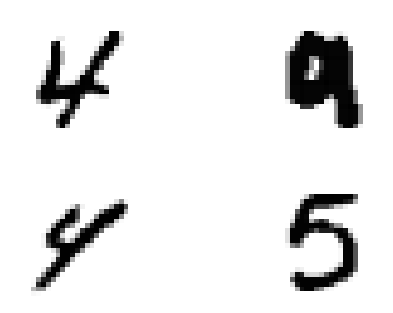

In [15]:
# Randomly plots four examples from the training data.
# Also prints their labels from the training data labels.
fig, axes = plt.subplots(nrows = 2, ncols = 2)
nums = []
for i in range(4):
    num = np.random.randint(0, len(X_train))
    nums.append(num)

# Removes ticks from all 4 subplots in one line.
plt.setp(axes, xticks = [], yticks = [])
    
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(X_train[nums[k]])
        k += 1

print(Y_train[nums[0]], Y_train[nums[1]])
print(Y_train[nums[2]], Y_train[nums[3]])

In [16]:
# This shows what the data actually looks like to the machine.
index = 1
print(Y_train[index])
pd.DataFrame(X_train[index])

0


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,13,86,...,32,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,16,179,254,...,231,54,15,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,72,254,254,...,254,254,104,0,0,0,0,0,0,0
8,0,0,0,0,0,0,61,191,254,254,...,254,254,243,85,0,0,0,0,0,0
9,0,0,0,0,0,0,172,254,254,254,...,254,254,254,171,0,0,0,0,0,0


In [17]:
# We need to format the data into the description:
#              n, depth, width, height.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(42000, 28, 28, 1)


In [0]:
# It's also wise to standardize the data type as float32.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# Finally, we should normalize the data to the range [0,1]. It started 0 to 255, so this should do the trick.
X_train /= 255
X_test /= 255

In [20]:
# We want a separate vector for each possible label. Right now we have a bunch of actual labels.
# That's no good.
print(Y_train.shape)
print(Y_train[:10]) # Peeps the first 10 elements of Y-train.

(42000,)
[1 0 1 4 0 0 7 3 5 3]


In [0]:
# Turns each possible label into a binary vector. Look up "one hot encoding" for more info
Y_train = np_utils.to_categorical(Y_train, 10)

In [22]:
# This is better.
print(Y_train.shape)
print(Y_train[:10]) # Now each label is a vector of the ten possible options.

(42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Creating the Convolutional Neural Network

In [0]:
# Moving right along, let's establish our model.
model = Sequential()

# We also add the first layer, the input layer.
model.add(Conv2D(32, (3, 3), strides = (1, 1), 
                 activation = "relu", input_shape = (28, 28, 1)))

 **Format of the Conv2D arguments**

filters : integer

kernal_size : tuple

strides : tuple (optional, default is (1,1))

activation : String

*Options include softmax, elu, relu, softplus, softsign, tanh, sigmoid, and more.*
    
input_shape : tuple (Conv2D expects a 3-tuple)

In [24]:
# Allows us to check the shape of the output of our model.
print(model.output_shape)

(None, 26, 26, 32)


In [25]:
model.add(Conv2D(32, (3, 3), activation = 'relu')) # The first hidden layer.
model.add(MaxPooling2D(pool_size = (2, 2))) # The first pooling layer. 
model.add(Dropout(0.25)) # First dropout layer.
print(model.output_shape) # Then check our output's shape.

(None, 12, 12, 32)


In [26]:
model.add(Conv2D(16, (2, 2), activation = "relu")) # The second hidden layer.
model.add(Dropout(0.15)) # Second dropout layer.
print(model.output_shape) # Then check our shape.

(None, 11, 11, 16)


In [27]:
# The Flatten layer merges all filters together.
model.add(Flatten())
print(model.output_shape)
print(11*11*16)

(None, 1936)
1936


In [0]:
# We add a fully connected layer, dropout one last time, and then have our final layer.
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "sigmoid"))

In [0]:
# Once we have all our layers, we can compile the model.
# The metrics argument allows us to specify different metrics for different outputs.
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Training and testing

In [30]:
# Trains the model for a given number of epochs. Takes about a minute and a half if we're on Colab's GPU. Any questions?
model.fit(X_train, Y_train, 
          batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
42000/42000 [==============================] - 19s 452us/step - loss: 0.3352 - acc: 0.9023
Epoch 2/5
42000/42000 [==============================] - 15s 361us/step - loss: 0.1173 - acc: 0.9652
Epoch 3/5
42000/42000 [==============================] - 15s 361us/step - loss: 0.0875 - acc: 0.9738
Epoch 4/5
42000/42000 [==============================] - 15s 360us/step - loss: 0.0752 - acc: 0.9769
Epoch 5/5
42000/42000 [==============================] - 15s 360us/step - loss: 0.0646 - acc: 0.9795


 **Format of the model.fit arguments**

batch_size determines how many samples to use for each gradient update.

epochs is the number of epochs to train the model. Each epoch is an iteration over the entire X, Y sets.

verbose has three possible settings:
* *0 would be silent.*
* *1 would be a progress bar.*
* *2 would be a message for each epoch.*

In [31]:
# This evaluates the model on the training data. 
# We have no test data from Kaggle, so this is the next best thing.
score = model.evaluate(X_train, Y_train, verbose = 1)

42000/42000 [==============================] - 5s 109us/step


In [32]:
# These are the loss and accuracy values. Ask someone who knows what they're doing what that means.
score

[0.02213823351506809, 0.9929523809523809]

Up to this point in the notebook, this article was the main source I used:

https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-1

In [33]:
# Creates a numpy array of our algorithm's predictions on the test dataset.
predictions = model.predict_classes(X_test, verbose = 1)
print(predictions.shape)
print(type(predictions))

28000/28000 [==============================] - 3s 90us/step
(28000,)
<class 'numpy.ndarray'>


In [0]:
# And then this exports our predictions to a csv file.
# Note that the submission suggestion was 1-indexed. Ugh.
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("predictions.csv", index = False)

# We could then submit that .csv to the Kaggle competition.

## Saving/loading a Keras model

Beyond all of that testing and training, we want the ability to save what our model has learned so far.

I had a source for the initial method I used to do this, but I ended up just reading Keras' documentation and found a better way to save models.

In [35]:
import h5py # Just in case.

def saveModel(model, fileName):
    """
    Saves a given Keras model into a .h5 file.
    
    Parameters
    ----------
    model : Keras model
        The model to be saved.
    fileName : String
        The main name of the files.
    """
    # Save model to HDF5
    h5_string = fileName + ".h5"
    model.save(h5_string)
    print("Saved model to disk")
    
saveModel(model, "model_one")

Saved model to disk


In [0]:
def loadModel(filePath):
    """
    Loads a given Keras model from a filepath.
    
    Parameters
    ----------
    filePath : String
        The path to the file.
    """
    loaded_model = keras.models.load_model(filePath)
    print("Loaded model from disk")
    return loaded_model

In [37]:
!ls MNIST_Notebook/

 30_epochs   dataset.zip  'Keras and CNNs (3).ipynb'   README.md


In [38]:
# Let's load in a pre-trained model from my Github.
new_model = loadModel("MNIST_Notebook/fifty_epochs.h5")

Loaded model from disk


In [0]:
new_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [60]:
new_model.fit(X_train, Y_train, 
              batch_size = 32, epochs = 1, verbose = 1)

Epoch 1/20
42000/42000 [==============================] - 21s 508us/step - loss: 0.0224 - acc: 0.9932
Epoch 2/20
42000/42000 [==============================] - 24s 570us/step - loss: 0.0210 - acc: 0.9936
Epoch 3/20
42000/42000 [==============================] - 25s 585us/step - loss: 0.0201 - acc: 0.9941
Epoch 4/20
42000/42000 [==============================] - 24s 572us/step - loss: 0.0208 - acc: 0.9935
Epoch 5/20
42000/42000 [==============================] - 24s 570us/step - loss: 0.0200 - acc: 0.9935
Epoch 6/20
42000/42000 [==============================] - 25s 596us/step - loss: 0.0186 - acc: 0.9942
Epoch 7/20
42000/42000 [==============================] - 25s 591us/step - loss: 0.0190 - acc: 0.9945
Epoch 8/20
42000/42000 [==============================] - 25s 584us/step - loss: 0.0177 - acc: 0.9944
Epoch 9/20
42000/42000 [==============================] - 25s 594us/step - loss: 0.0191 - acc: 0.9939
Epoch 10/20
42000/42000 [==============================] - 25s 597us/step - loss: 

In [40]:
score = new_model.evaluate(X_train, Y_train, verbose = 1)
score

42000/42000 [==============================] - 5s 112us/step


[0.0023064056787046477, 0.9994761904761905]

As a note:

* The test accuracy was 0.9994761904761905 after 30 epochs.
* It was 0.9996428571428572 after 50 epochs, with a lot of fluctuation.

In [41]:
saveModel(new_model, "fiftyone_epochs")

Saved model to disk


In [42]:
# Let's see if a new file is there.
!ls

dataset		 __MACOSX	 model_one.h5	  sample_data
fifty_epochs.h5  MNIST_Notebook  predictions.csv


In [0]:
from google.colab import files
files.download("fiftyone_epochs.h5")

In [44]:
# This creates the .csv of our new preditions.

predictions = new_model.predict_classes(X_test, verbose = 1)
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("51_epochs.csv", index = False)

28000/28000 [==============================] - 3s 93us/step


In [0]:
files.download("51_epochs.csv")

As one last thing, the command to submit a csv file to Kaggle is:

kaggle competitions submit -c digit-recognizer -f filepath/etc/submission.csv -m "This is my message."